In [100]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# modeling imports
from sklearn.model_selection import train_test_split,cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
import joblib
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
accuracy_score, plot_roc_curve, roc_auc_score, recall_score, precision_score

In [2]:
df = pd.read_csv('./data/train.csv')

In [3]:
df.shape

(3751, 1777)

In [4]:
df.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [5]:
nulls = df.isnull().sum().sort_values(ascending =False)
nulls[nulls > 0]

Series([], dtype: int64)

In [6]:
df['Activity'].value_counts(normalize=True)

1    0.542255
0    0.457745
Name: Activity, dtype: float64

In [7]:
describedf = df.describe().T

In [8]:
X = df.drop(columns='Activity')
y = df['Activity']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, stratify = y)

In [ ]:
#https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

In [10]:
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train)

In [11]:
X_test_pca = pca.transform(X_test)

In [12]:
X_train_pca

array([[-2.91697789e+00,  1.46044655e+00, -8.36538409e-02, ...,
        -3.94578367e-18, -3.43330048e-18,  1.44578958e-15],
       [-3.73646344e+00,  2.34996362e+00, -6.87989859e-01, ...,
         5.89971199e-17, -4.97632703e-17,  1.41592554e-16],
       [ 2.86488462e-01, -4.12970365e+00,  8.39523869e-01, ...,
         1.90826498e-16,  4.52719796e-17,  2.36760182e-16],
       ...,
       [ 8.16250493e+00,  4.67390868e+00,  7.88067866e+00, ...,
        -7.25846306e-18,  1.11200528e-18,  1.74530530e-17],
       [ 5.36047033e+00,  5.23117355e-01, -1.70032844e+00, ...,
        -1.06935400e-16, -7.67360566e-17,  3.34346667e-17],
       [-5.00000215e-01, -3.45569446e+00,  6.03250006e-01, ...,
         1.91889126e-16,  1.17098056e-16,  8.88215934e-17]])

In [13]:
explained_variance = pca.explained_variance_ratio_

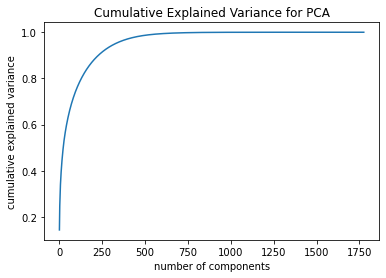

In [123]:
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative Explained Variance for PCA');

In [15]:
len(explained_variance)

1776

In [16]:
rfc = RandomForestClassifier()

In [17]:
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [18]:
rfc.score(X_train_pca,y_train),rfc.score(X_test_pca,y_test)

(1.0, 0.6496572734196496)

In [19]:
pca2 = PCA(n_components=500,random_state=42)

In [20]:
pca2 = PCA(n_components=500,random_state=42)
X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.transform(X_test)

In [21]:
X_test_pca2 = pca2.transform(X_test)

In [22]:
X_train_pca2.shape

(2438, 500)

In [25]:
rfc2 = RandomForestClassifier()

In [26]:
rfc2.fit(X_train_pca2,y_train)

RandomForestClassifier()

In [27]:
rfc2.score(X_train_pca2,y_train),rfc2.score(X_test_pca2,y_test)

(1.0, 0.7418126428027418)

### baseline model

In [101]:
X = df.drop(columns='Activity')
y = df['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, stratify = y)

In [102]:
dc = DummyClassifier(strategy='most_frequent')
dc.fit(X,y)
print(f'dummy score: {dc.score(X,y)}')
null_preds = dc.predict(X)

dummy score: 0.5422553985603839


In [104]:
roc_auc_score(y_train,dc.predict_log_proba(X_train)[:,1])

C:\Users\DanAn\anaconda3secondinstall\lib\site-packages\sklearn\dummy.py:354: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


0.5

In [105]:
joblib.dump(dc,'./models/baseline.pkl')

['./models/baseline.pkl']

In [ ]:
joblib.dump(modelname,'./models/modelname.pkl')

me: random forest, extra trees. ryan: bagging, support vector. ben: log reg + boost

# serious model attempts:

# random forest

In [34]:
X = df.drop(columns='Activity')
y = df['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, stratify = y)

In [36]:
pipe1 = Pipeline([
    ('pca', PCA(random_state=42)),
    ('rfc', RandomForestClassifier())
])

In [43]:
pipe1_params = {
    'pca__n_components' : list(range(300,801,50)),
    'rfc__n_estimators': [500, 750, 1000, 1250],
    'rfc__max_depth': [5,10,15,20,25,30,35],
    'rfc__min_samples_split': [1,2,3,4,5,6,7],
    'rfc__min_samples_leaf': [2, 3,4,5],
    'rfc__max_features' : ['auto', 'sqrt', 'log2']
    
}

In [48]:
rf_pipe1 = RandomizedSearchCV(pipe1,pipe1_params,cv=5,n_iter=100,verbose=1,n_jobs=-2,random_state=42)

In [49]:
rf_pipe1.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-2)]: Done 420 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed: 16.8min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'pca__n_components': [300, 350, 400,
                                                              450, 500, 550,
                                                              600, 650, 700,
                                                              750, 800],
                                        'rfc__max_depth': [5, 10, 15, 20, 25,
                                                           30, 35],
                                        'rfc__max_features': ['auto', 'sqrt',
                                                              'log2'],
                                        'rfc__min_samples_leaf': [2, 3, 4, 5],
                                        'rfc__min_s

In [50]:
rf_pipe1.best_params_

{'rfc__n_estimators': 750,
 'rfc__min_samples_split': 3,
 'rfc__min_samples_leaf': 5,
 'rfc__max_features': 'auto',
 'rfc__max_depth': 10,
 'pca__n_components': 600}

In [51]:
rf_pipe1.best_score_

0.7715336452687919

In [52]:
rf_pipe1.score(X_train,y_train), rf_pipe1.score(X_test,y_test)

(0.985233798195242, 0.7585681645087585)

In [99]:
roc_auc_score(y_train, rf_pipe1.predict_proba(X_train)[:,1]),roc_auc_score(y_test, rf_pipe1.predict_log_proba(X_test)[:,1])

(0.9980391120220802, 0.8312760567593336)

In [57]:
roc_auc_score(y_test, rf_pipe1.predict_proba(X_test)[:,1])

0.8312760567593336

In [106]:
joblib.dump(rf_pipe1,'./models/RandomForest_1.pkl')

['./models/RandomForest_1.pkl']

In [119]:
pipe2 = Pipeline([
    ('pca', PCA(random_state=42)),
    ('rfc', RandomForestClassifier())
])

In [120]:
pipe2_params = {
    'pca__n_components' : list(range(300,901,50)),
    'rfc__n_estimators': list(range(500,3000,100)),
    'rfc__max_depth': [5,10,15,20,25,30,35],
    'rfc__min_samples_split': [1,2,3,4,5,6,7],
    'rfc__min_samples_leaf': [2, 3,4,5],
    'rfc__max_features' : ['auto', 'sqrt', 'log2']
    
}

In [121]:
rf_pipe2 = RandomizedSearchCV(pipe2,pipe2_params,cv=5,n_iter=100,verbose=1,n_jobs=-2,random_state=42,scoring='roc_auc')

In [122]:
rf_pipe2.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-2)]: Done 420 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed: 31.4min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'pca__n_components': [300, 350, 400,
                                                              450, 500, 550,
                                                              600, 650, 700,
                                                              750, 800, 850,
                                                              900],
                                        'rfc__max_depth': [5, 10, 15, 20, 25,
                                                           30, 35],
                                        'rfc__max_features': ['auto', 'sqrt',
                                                              'log2'],
                                        'rfc__min_samples_

In [124]:
rf_pipe2.best_score_

0.8405347230539716

In [127]:
rf_pipe2.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=300, random_state=42)),
                ('rfc',
                 RandomForestClassifier(max_depth=25, min_samples_leaf=4,
                                        n_estimators=2200))])

In [125]:
rf_pipe2.score(X_train, y_train), rf_pipe2.score(X_test,y_test)

(0.9994841908913941, 0.8370716408981285)

In [126]:
joblib.dump(rf_pipe2,'./models/RandomForest_roc.pkl')

['./models/RandomForest_roc.pkl']

In [128]:
pipe3_params = {
    'pca__n_components' : list(range(150,801,50)),
    'rfc__n_estimators': list(range(2000,3000,50)),
    'rfc__max_depth': [20,21,22,23,24,25,30,35],
    'rfc__min_samples_split': [1,2,3,4,5,6,7],
    'rfc__min_samples_leaf': [3,4,5,6],
    'rfc__max_features' : ['auto', 'sqrt', 'log2']
    
}

In [130]:
rf_pipe3 = RandomizedSearchCV(pipe2,pipe3_params,cv=5,n_iter=100,verbose=1,n_jobs=-2,random_state=42,scoring='roc_auc')

In [131]:
rf_pipe3.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-2)]: Done 420 tasks      | elapsed: 31.1min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed: 37.0min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'pca__n_components': [150, 200, 250,
                                                              300, 350, 400,
                                                              450, 500, 550,
                                                              600, 650, 700,
                                                              750, 800],
                                        'rfc__max_depth': [20, 21, 22, 23, 24,
                                                           25, 30, 35],
                                        'rfc__max_features': ['auto', 'sqrt',
                                                              'log2'],
                                        'rfc__mi

# Extra Trees.

In [84]:
pipe_et = Pipeline([
    ('pca', PCA(random_state=42)),
    ('et', ExtraTreesClassifier(random_state=42))
])

In [88]:
et_params = {
    'pca__n_components' : list(range(300,801,50)),
    'et__n_estimators': list(range(500,1000,100)),
    'et__max_depth':[10,15,20,25,30,35],
    'et__min_samples_split': [1,2,3,4,5],
    'et__min_samples_leaf': [1,2,3,4,5],
    'et__bootstrap': [True, False],
    'et__max_features': ['auto'],
    'et__class_weight': ['balanced'],
    'et__ccp_alpha' : list(range(1,51,10))
}

In [89]:
et_model = RandomizedSearchCV(pipe_et,et_params,cv=5,n_iter=100,verbose=1,n_jobs=-2,random_state=42,scoring='roc_auc')           

In [90]:
et_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-2)]: Done 420 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed: 10.5min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('et',
                                              ExtraTreesClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'et__bootstrap': [True, False],
                                        'et__ccp_alpha': [1, 11, 21, 31, 41],
                                        'et__class_weight': ['balanced'],
                                        'et__max_depth': [10, 15, 20, 25, 30,
                                                          35],
                                        'et__max_features': ['auto'],
                                        'et__min_samples_leaf': [1, 2, 3, 4, 5],
                                        'et__min_samples_split': [1, 2, 3, 4,
                                                                  5],
                                        'et__n_estima

In [91]:
et_model.best_params_

{'pca__n_components': 800,
 'et__n_estimators': 500,
 'et__min_samples_split': 3,
 'et__min_samples_leaf': 3,
 'et__max_features': 'auto',
 'et__max_depth': 35,
 'et__class_weight': 'balanced',
 'et__ccp_alpha': 11,
 'et__bootstrap': True}

In [92]:
et_model.best_score_

0.5

In [94]:
et_model.score(X_train,y_train), et_model.score(X_test,y_test)

(0.5, 0.5)

In [ ]:
accuracy_

In [95]:
et_model_2 = RandomizedSearchCV(pipe_et,et_params,cv=5,n_iter=100,verbose=1,n_jobs=-2,random_state=42)           

In [96]:
et_model_2.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-2)]: Done 420 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed: 10.6min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('et',
                                              ExtraTreesClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'et__bootstrap': [True, False],
                                        'et__ccp_alpha': [1, 11, 21, 31, 41],
                                        'et__class_weight': ['balanced'],
                                        'et__max_depth': [10, 15, 20, 25, 30,
                                                          35],
                                        'et__max_features': ['auto'],
                                        'et__min_samples_leaf': [1, 2, 3, 4, 5],
                                        'et__min_samples_split': [1, 2, 3, 4,
                                                                  5],
                                        'et__n_estima

In [97]:
et_model_2.best_score_

0.5254098360655738

In [111]:
joblib.dump(et_model,'./models/ExtraTrees_broke.pkl')

['./models/ExtraTrees_broke.pkl']

In [107]:
pipe_et = Pipeline([
    ('pca', PCA(random_state=42)),
    ('et', ExtraTreesClassifier(random_state=42))
])

In [112]:
et_params = {
    'pca__n_components' : list(range(300,801,50)),
    'et__n_estimators': list(range(500,3000,100)),
    'et__max_depth':[10,15,20,25,30,35],
    'et__min_samples_split': [1,2,3,4,5],
    'et__min_samples_leaf': [1,2,3,4,5],
    'et__bootstrap': [True, False],
    'et__max_features': ['auto'],
    'et__class_weight': ['balanced'],
    'et__ccp_alpha' : list(range(1,51,10))
}

In [113]:
et_model = RandomizedSearchCV(pipe_et,et_params,cv=5,n_iter=100,verbose=1,n_jobs=-2,random_state=42,scoring='roc_auc')           

In [114]:
et_model.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-2)]: Done 170 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-2)]: Done 420 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed: 17.1min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('et',
                                              ExtraTreesClassifier(random_state=42))]),
                   n_iter=100, n_jobs=-2,
                   param_distributions={'et__bootstrap': [True, False],
                                        'et__ccp_alpha': [1, 11, 21, 31, 41],
                                        'et__class_weight': ['balanced'],
                                        'et__max_depth': [10, 15, 20, 25, 30,
                                                          35],
                                        'et__max_features': ['auto'],
                                        'et__min_samples_leaf': [1, 2, 3, 4, 5],
                                        'et__min_samples_split': [1, 2, 3, 4,
                                                                  5],
                                        'et__n_estima

In [115]:
et_model.best_score_

0.5

In [116]:
et_model.best_params_

{'pca__n_components': 350,
 'et__n_estimators': 1700,
 'et__min_samples_split': 4,
 'et__min_samples_leaf': 4,
 'et__max_features': 'auto',
 'et__max_depth': 35,
 'et__class_weight': 'balanced',
 'et__ccp_alpha': 21,
 'et__bootstrap': True}

Completely failed, is the same as the baseline model. 


In [ ]:
import joblib
random_forest = joblib.load('./models/RandomForest_1.pkl')
baseline = joblib.load('./models/baseline.pkl')
extra_trees = joblib.load('./models/ExtraTrees_broke.pkl')